<h1>Импорт библиотек

In [6]:
import matplotlib as plt
import numpy as np

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [7]:
def sum_prod(matrices, vectors):
    if len(matrices) != len(vectors):
        raise ValueError("Количество матриц должно совпадать с количеством векторов")
    
    result = np.zeros(matrices[0].shape[0])
    
    for matrix, vector in zip(matrices, vectors):
        result += np.dot(matrix, vector).flatten()
    
    return result

if __name__ == "__main__":

    matrix3 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    vector3 = np.array([[1], [2], [3]])
    
    matrices = [matrix3]
    vectors = [vector3]
    
    result = sum_prod(matrices, vectors)
    print(result)  # Ожидаем [1. 2. 3.], так как это единичная матрица

    matrix4 = np.array([[2, 0], [0, 2]])
    vector4 = np.array([[3], [4]])
    
    matrices = [matrix4]
    vectors = [vector4]
    
    result = sum_prod(matrices, vectors)
    print(result)  # Ожидаем [6. 8.], так как 2*3 = 6 и 2*4 = 8

[1. 2. 3.]
[6. 8.]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [8]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

if __name__ == "__main__":
    M1 = np.array([[0.1, 0.6], [0.4, 0.8]])
    threshold1 = 0.5
    result1 = binarize(M1, threshold1)
    print(result1)  # Ожидаем [[0 1] [0 1]]

    M2 = np.array([[0.5, 0.5], [0.5, 0.5]])
    threshold2 = 0.5
    result2 = binarize(M2, threshold2)
    print(result2)  # Ожидаем [[0 0] [0 0]]

    M3 = np.array([[0.9, 0.1, 0.3], [0.7, 0.2, 0.8]])
    threshold3 = 0.4
    result3 = binarize(M3, threshold3)
    print(result3)  # Ожидаем [[1 0 0] [1 0 1]]

    M4 = np.array([[1.0, 0.0], [0.0, 1.0]])
    threshold4 = 0.5
    result4 = binarize(M4, threshold4)
    print(result4)  # Ожидаем [[1 0] [0 1]]

    M5 = np.array([[0.2, 0.3], [0.1, 0.4]])
    threshold5 = 0.5
    result5 = binarize(M5, threshold5)
    print(result5)  # Ожидаем [[0 0] [0 0]]

[[0 1]
 [0 1]]
[[0 0]
 [0 0]]
[[1 0 0]
 [1 0 1]]
[[1 0]
 [0 1]]
[[0 0]
 [0 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [9]:
def unique_elements_rows(matrix):
    return [np.unique(row).tolist() for row in matrix]

def unique_elements_columns(matrix):
    return [np.unique(column).tolist() for column in matrix.T]

if __name__ == "__main__":
    matrix = np.array([
        [1, 2, 2, 3],
        [4, 5, 5, 6],
        [1, 4, 4, 3]
    ])

    print("Уникальные элементы по строкам:")
    print(unique_elements_rows(matrix))  # Ожидание: [[1, 2, 3], [4, 5, 6], [1, 4, 3]]

    print("Уникальные элементы по столбцам:")
    print(unique_elements_columns(matrix))  # Ожидание: [[1, 4], [2, 5], [3, 6]]

Уникальные элементы по строкам:
[[1, 2, 3], [4, 5, 6], [1, 3, 4]]
Уникальные элементы по столбцам:
[[1, 4], [2, 4, 5], [2, 4, 5], [3, 6]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Сгенерированная матрица:
[[-0.37498212  0.34167796  2.33215123 -0.50423155]
 [ 0.07999953  0.05195469  1.34049843  1.2380338 ]
 [ 0.04168652  1.91594722 -1.2143783   1.3054996 ]]

Мат. ожидание по строкам: [0.44865388 0.67762161 0.51218876]
Дисперсия по строкам: [1.28634326 0.37551968 1.45057152]
Мат. ожидание по столбцам: [-0.08443202  0.76985996  0.81942379  0.67976728]
Дисперсия по столбцам: [0.04245433 0.67074794 2.23207135 0.70168522]


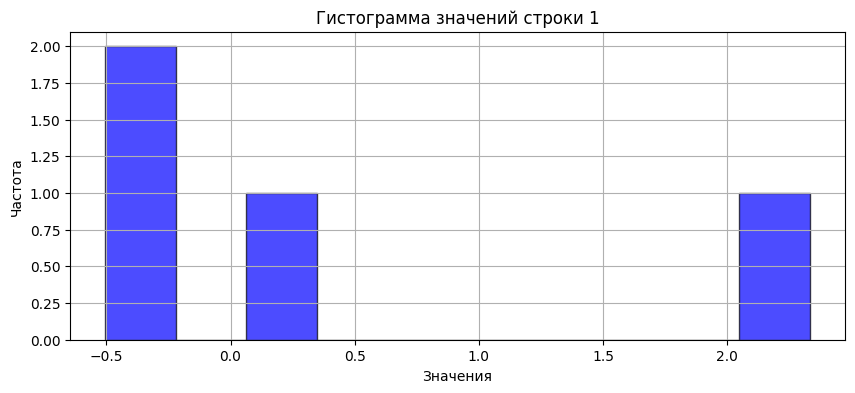

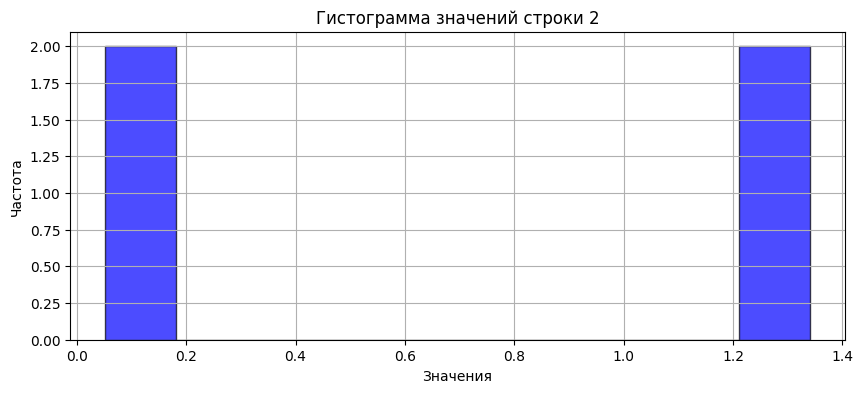

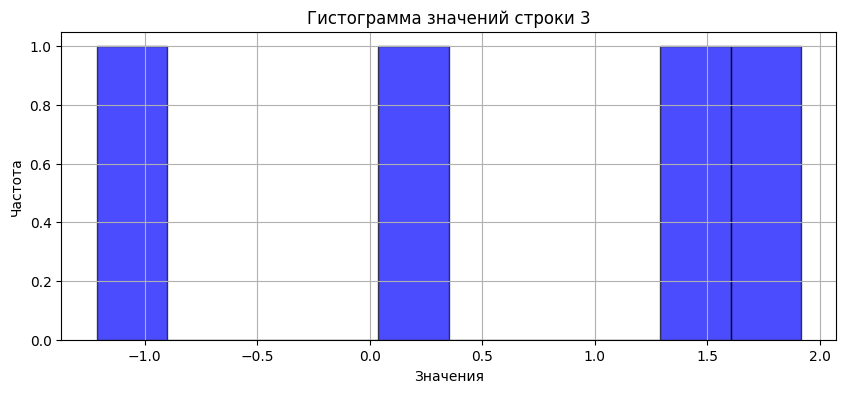

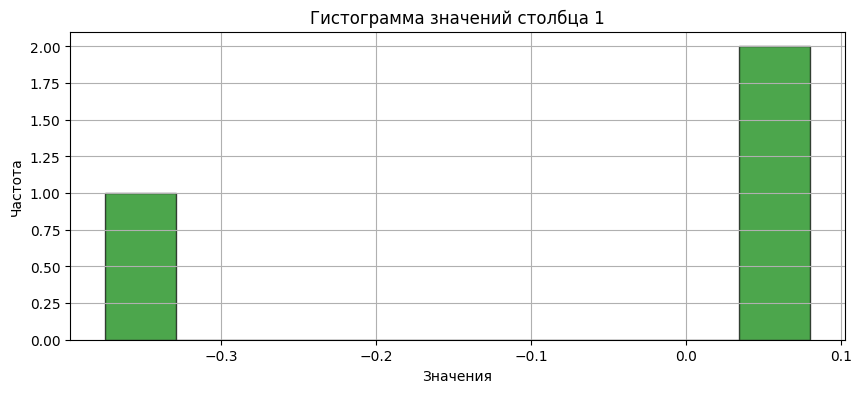

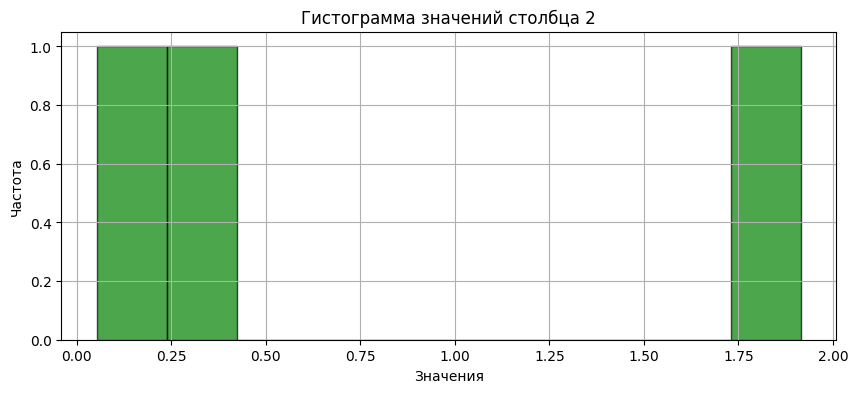

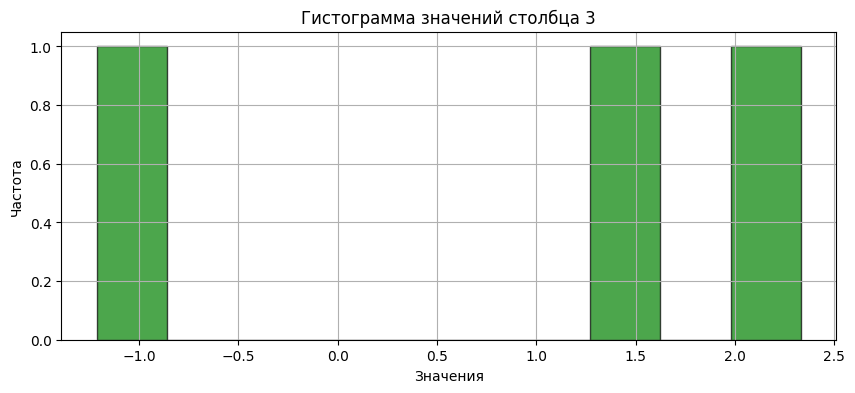

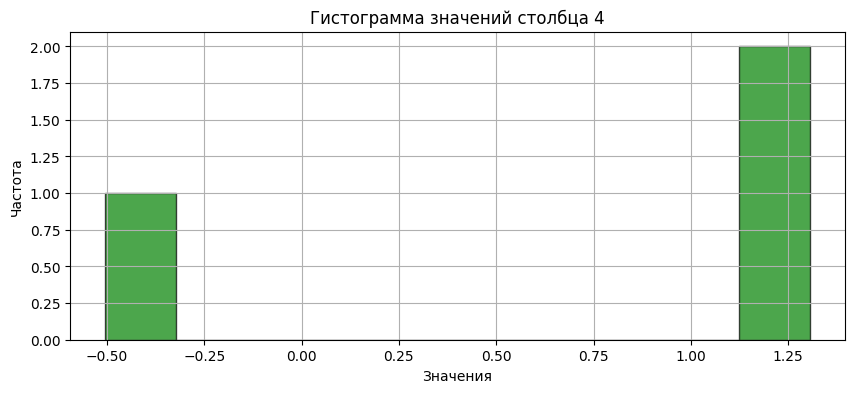

In [14]:
import matplotlib.pyplot as plt

def fill_matrix(m, n):
    return np.random.normal(loc=0, scale=1, size=(m, n))

def calculate_statistics(matrix):
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    
    return row_means, row_variances, col_means, col_variances

def plot_histograms(matrix):
    num_rows, num_cols = matrix.shape
    
    for i in range(num_rows):
        plt.figure(figsize=(10, 4))
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Гистограмма значений строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()
    
    for j in range(num_cols):
        plt.figure(figsize=(10, 4))
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Гистограмма значений столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

if __name__ == "__main__":
    m, n = 3, 4
    matrix = fill_matrix(m, n)
    
    print("Сгенерированная матрица:")
    print(matrix)
    
    row_means, row_variances, col_means, col_variances = calculate_statistics(matrix)
    
    print("\nМат. ожидание по строкам:", row_means)
    print("Дисперсия по строкам:", row_variances)
    print("Мат. ожидание по столбцам:", col_means)
    print("Дисперсия по столбцам:", col_variances)
    
    plot_histograms(matrix)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
def chess(m, n, a, b):
    matrix = [[0] * n for _ in range(m)]

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b

    return matrix

if __name__ == "__main__":
    # Тест 1: 3x3 матрица с a=1 и b=0
    result1 = chess(3, 3, 1, 0)
    print("Тест 1 (3x3, a=1, b=0):")
    for row in result1:
        print(row)

    # Тест 2: 4x4 матрица с a=2 и b=3
    result2 = chess(4, 4, 2, 3)
    print("\nТест 2 (4x4, a=2, b=3):")
    for row in result2:
        print(row)

    # Тест 3: 5x2 матрица с a=5 и b=10
    result3 = chess(5, 2, 5, 10)
    print("\nТест 3 (5x2, a=5, b=10):")
    for row in result3:
        print(row)

    # Тест 4: 2x5 матрица с a=7 и b=8
    result4 = chess(2, 5, 7, 8)
    print("\nТест 4 (2x5, a=7, b=8):")
    for row in result4:
        print(row)

Тест 1 (3x3, a=1, b=0):
[1, 0, 1]
[0, 1, 0]
[1, 0, 1]

Тест 2 (4x4, a=2, b=3):
[2, 3, 2, 3]
[3, 2, 3, 2]
[2, 3, 2, 3]
[3, 2, 3, 2]

Тест 3 (5x2, a=5, b=10):
[5, 10]
[10, 5]
[5, 10]
[10, 5]
[5, 10]

Тест 4 (2x5, a=7, b=8):
[7, 8, 7, 8, 7]
[8, 7, 8, 7, 8]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Тест 1: Прямоугольник


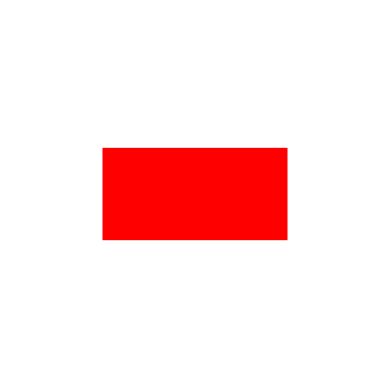

Тест 2: Эллипс


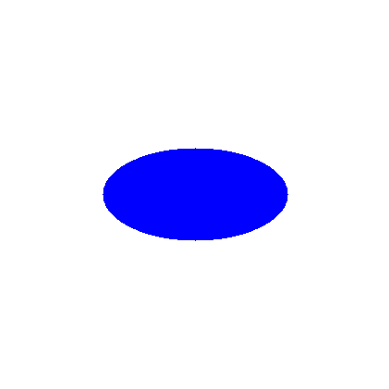

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(m, n, a, b, background_color, rectangle_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color

    start_x = (n - a) // 2
    start_y = (m - b) // 2

    image[start_y:start_y + b, start_x:start_x + a] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(m, n, a, b, background_color, oval_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color

    center_x = n // 2
    center_y = m // 2

    for y in range(m):
        for x in range(n):
            if ((x - center_x) ** 2) / (a ** 2) + ((y - center_y) ** 2) / (b ** 2) <= 1:
                image[y, x] = oval_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Тест 1: Прямоугольник")
    draw_rectangle(400, 400, 200, 100, background_color=(255, 255, 255), rectangle_color=(255, 0, 0))

    print("Тест 2: Эллипс")
    draw_ellipse(400, 400, 100, 50, background_color=(255, 255, 255), oval_color=(0, 0, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [21]:
def analyze_time_series(time_series, p):
    
    math_expectation = np.mean(time_series).tolist()
    dispersion = np.var(time_series).tolist()
    deviation = np.sqrt(dispersion).tolist()

    local_max = (np.diff(np.sign(np.diff(time_series))) < 0).nonzero()[0] + 1
    local_max = local_max.tolist()
    local_min = (np.diff(np.sign(np.diff(time_series))) > 0).nonzero()[0] + 1
    local_min = local_min.tolist()

    moving_average = np.convolve(time_series, np.ones(p)/p, mode='valid')
    moving_average = moving_average.tolist()

    return {
        "math_expectation": math_expectation,
        "dispersion": dispersion,
        "deviation": deviation,
        "local_max": local_max,
        "local_min": local_min,
        "moving_average": moving_average
    }

analyze_time_series([3, 5, 2, 8, 7, 4, 6, 5, 4, 9, 8, 3], 3)

{'math_expectation': 5.333333333333333,
 'dispersion': 4.722222222222222,
 'deviation': 2.173067468400883,
 'local_max': [1, 3, 6, 9],
 'local_min': [2, 5, 8],
 'moving_average': [3.333333333333333,
  5.0,
  5.666666666666666,
  6.333333333333333,
  5.666666666666666,
  5.0,
  5.0,
  6.0,
  7.0,
  6.666666666666666]}

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [23]:
import numpy as np

def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    
    for idx, label in enumerate(labels):
        one_hot[idx, label] = 1
    
    return one_hot

if __name__ == "__main__":
    labels = [0, 2, 3, 0]
    one_hot_encoded = one_hot_encoding(labels)
    print("One-hot encoding:")
    print(one_hot_encoded)

One-hot encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
